In [1]:
import random
import numpy as np
import pandas as pd
random.seed(3311791)
np.random.seed(3311791)
!pip install xlsxwriter
!pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 3.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.0/54.0 kB 2.3 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 21.3
    Uninstalling packaging-21.3:
      Successfully uninstalled packaging-21.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
keras-cv 0.8.2 requires keras-core, which is not installed.
keras-nlp 0.9.3 requires keras-core, which is not installed.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.
google-cloud-bigquery 2.34.4 requires packaging<22.0dev,>=14.3, but you have packaging 24.1 which is incompatible.
jupyterlab 4.1.6 requires jupyter-lsp>=2.0.0, but you have jupyter-lsp 1.5.1 which is incompatible.
jup

In [15]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning) # to ignore Data Validation (Excel file) warning


filepath_Kai = '/kaggle/input/ratings/Important Co-Occurrences_updated_Kai_ratings.xlsx'
filepath_Oliver = '/kaggle/input/ratings/Sampled Important Co-Occurrences_updated_Oliver_ratings.xlsx'
filepath_Ruya = '/kaggle/input/ratings/Sampled Important Co-Occurrences_updated_Ruya_ratings.xlsx'

sheet_names = ['1920 - 1990', '1991 - 2008', '2009 - 2016', '2017 - 2023']

df_Kai1 = pd.DataFrame()
df_Oliver1 = pd.DataFrame()
df_Ruya1 = pd.DataFrame()

for sheet in sheet_names:
    sample_indices = np.load(f'/kaggle/input/random-samp/random_sample_{sheet} (10 of data).npy')
    
    sheet_Kai = pd.read_excel(filepath_Kai, sheet_name=sheet).iloc[sample_indices,7:10]
    sheet_Oliver = pd.read_excel(filepath_Oliver, sheet_name=sheet).iloc[:,8:11]
    sheet_Ruya = pd.read_excel(filepath_Ruya, sheet_name=sheet).iloc[:,8:11]

    df_Kai1 = pd.concat([df_Kai1, sheet_Kai])
    df_Oliver1 = pd.concat([df_Oliver1, sheet_Oliver])
    df_Ruya1 = pd.concat([df_Ruya1, sheet_Ruya])
df_Kai1.reset_index(drop=True, inplace=True)
df_Oliver1.reset_index(drop=True, inplace=True)
df_Ruya1.reset_index(drop=True, inplace=True)

# drop indices with no co-occurrences within the same sentence
df_Kai1 = df_Kai1.drop([16,17]) 
df_Oliver1 = df_Oliver1.drop([16,17])
df_Ruya1 = df_Ruya1.drop([16,17])

new_columns = ['Question 2', 'Question 3', 'Question 4']
df_Kai1.columns = new_columns
df_Oliver1.columns = new_columns
df_Ruya1.columns = new_columns


In [6]:
import warnings
import numpy as np
import pandas as pd

warnings.filterwarnings("ignore", category=UserWarning)  # to ignore Data Validation (Excel file) warning

filepath_Kai = '/kaggle/input/ratings/Important Co-Occurrences_updated_Kai_ratings.xlsx'
filepath_Oliver = '/kaggle/input/ratings/Important Co-Occurrences_89percent_kzg.xlsx'
filepath_Ruya = '/kaggle/input/ratings/Important Co-Occurrences_89percent_Ruya.xlsx'
sheet_names = ['1920 - 1990', '1991 - 2008', '2009 - 2016', '2017 - 2023']

df_Kai2 = pd.DataFrame()
df_Oliver2 = pd.DataFrame()
df_Ruya2 = pd.DataFrame()

for sheet in sheet_names:
    sample_indices = np.load(f'/kaggle/input/random-samp/random_sample_{sheet} (10 of data).npy')
    
    sheet_Kai = pd.read_excel(filepath_Kai, sheet_name=sheet).iloc[:,7:10]
    sheet_Oliver = pd.read_excel(filepath_Oliver, sheet_name=sheet).iloc[:,7:10]
    sheet_Ruya = pd.read_excel(filepath_Ruya, sheet_name=sheet).iloc[:,7:10]
    
    # Combine all three sheets
    combined_sheet = pd.concat([sheet_Kai, sheet_Oliver, sheet_Ruya], axis=1)
    
    # Keep only rows where none of the sheets have NaNs
    valid_rows = combined_sheet.notna().all(axis=1)
    
    df_Kai2 = pd.concat([df_Kai2, sheet_Kai[valid_rows]])
    df_Oliver2 = pd.concat([df_Oliver2, sheet_Oliver[valid_rows]])
    df_Ruya2 = pd.concat([df_Ruya2, sheet_Ruya[valid_rows]])

df_Kai2.reset_index(drop=True, inplace=True)
df_Oliver2.reset_index(drop=True, inplace=True)
df_Ruya2.reset_index(drop=True, inplace=True)

# drop indices with no co-occurrences within the same sentence
df_Kai2 = df_Kai2.drop([16,17]) 
df_Oliver2 = df_Oliver2.drop([16,17])
df_Ruya2 = df_Ruya2.drop([16,17])

new_columns = ['Question 2', 'Question 3', 'Question 4']
df_Kai2.columns = new_columns
df_Oliver2.columns = new_columns
df_Ruya2.columns = new_columns

print(f"Number of rows in each dataframe: {len(df_Kai2)}")
print(f"Shape of df_Kai2: {df_Kai2.shape}")
print(f"Shape of df_Oliver2: {df_Oliver2.shape}")
print(f"Shape of df_Ruya2: {df_Ruya2.shape}")

Number of rows in each dataframe: 200
Shape of df_Kai2: (200, 3)
Shape of df_Oliver2: (200, 3)
Shape of df_Ruya2: (200, 3)


In [8]:
df_Kai = pd.concat([df_Kai1, df_Kai2])
df_Oliver = pd.concat([df_Oliver1, df_Oliver2])
df_Ruya = pd.concat([df_Ruya1, df_Ruya2])

In [ ]:
from statistics import mean
from itertools import combinations
from sklearn.metrics import cohen_kappa_score


# List of dataframes and corresponding rater names
dfs = [(df_Kai, 'Kai'), (df_Oliver, 'Oliver'), (df_Ruya, 'Ruya')]

for i in range(6):  
    kappas = []  
    for (df1, rater1), (df2, rater2) in combinations(dfs, 2):
        kappa = cohen_kappa_score(df1.iloc[:, i], df2.iloc[:, i])
        kappas.append(kappa)
        print(f"Cohen's Kappa for question {i+1} between {rater1} and {rater2}: {kappa}")
    avg_kappa = mean(kappas)
    print(f"Average Cohen's Kappa for question {i+1}: {avg_kappa}")

In [14]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning) # to ignore Data Validation (Excel file) warning


filepath_Kai = '/kaggle/input/ratings/Important Co-Occurrences_updated_Kai_ratings.xlsx'
filepath_Oliver = '/kaggle/input/ratings/Sampled Important Co-Occurrences_updated_Oliver_ratings.xlsx'
filepath_Ruya = '/kaggle/input/ratings/Sampled Important Co-Occurrences_updated_Ruya_ratings.xlsx'

sheet_names = ['1920 - 1990', '1991 - 2008', '2009 - 2016', '2017 - 2023']

df_Kai = pd.DataFrame()
df_Oliver = pd.DataFrame()
df_Ruya = pd.DataFrame()

for sheet in sheet_names:
    sample_indices = np.load(f'/kaggle/input/random-samp/random_sample_{sheet} (10 of data).npy')
    
    sheet_Kai = pd.read_excel(filepath_Kai, sheet_name=sheet).iloc[sample_indices,6:12]
    sheet_Oliver = pd.read_excel(filepath_Oliver, sheet_name=sheet).iloc[:,7:13]
    sheet_Ruya = pd.read_excel(filepath_Ruya, sheet_name=sheet).iloc[:,7:13]

    df_Kai = pd.concat([df_Kai, sheet_Kai])
    df_Oliver = pd.concat([df_Oliver, sheet_Oliver])
    df_Ruya = pd.concat([df_Ruya, sheet_Ruya])
df_Kai.reset_index(drop=True, inplace=True)
df_Oliver.reset_index(drop=True, inplace=True)
df_Ruya.reset_index(drop=True, inplace=True)

# drop indices with no co-occurrences within the same sentence
df_Kai = df_Kai.drop([16,17]) 
df_Oliver = df_Oliver.drop([16,17])
df_Ruya = df_Ruya.drop([16,17])

new_columns = ['Question 1', 'Question 2', 'Question 3', 'Question 4', 'Question 5', 'Question 6']
df_Kai.columns = new_columns
df_Oliver.columns = new_columns
df_Ruya.columns = new_columns


In [14]:
from statistics import mean
from itertools import combinations
from sklearn.metrics import cohen_kappa_score


# List of dataframes and corresponding rater names
dfs = [(df_Kai, 'Kai'), (df_Oliver, 'Oliver'), (df_Ruya, 'Ruya')]

for i in range(6):  
    kappas = []  
    for (df1, rater1), (df2, rater2) in combinations(dfs, 2):
        kappa = cohen_kappa_score(df1.iloc[:, i], df2.iloc[:, i])
        kappas.append(kappa)
        print(f"Cohen's Kappa for question {i+1} between {rater1} and {rater2}: {kappa}")
    avg_kappa = mean(kappas)
    print(f"Average Cohen's Kappa for question {i+1}: {avg_kappa}")


Cohen's Kappa for question 1 between Kai and Oliver: 0.48643931256713213
Cohen's Kappa for question 1 between Kai and Ruya: 0.39459795094691086
Cohen's Kappa for question 1 between Oliver and Ruya: 0.6204507931950327
Average Cohen's Kappa for question 1: 0.5004960189030252
Cohen's Kappa for question 2 between Kai and Oliver: 0.3029102544568032
Cohen's Kappa for question 2 between Kai and Ruya: 0.4200683330336271
Cohen's Kappa for question 2 between Oliver and Ruya: 0.3358310626702997
Average Cohen's Kappa for question 2: 0.35293655005357666
Cohen's Kappa for question 3 between Kai and Oliver: 0.4291844149336005
Cohen's Kappa for question 3 between Kai and Ruya: 0.7027741083223249
Cohen's Kappa for question 3 between Oliver and Ruya: 0.34584664536741216
Average Cohen's Kappa for question 3: 0.49260172287444587


IndexError: single positional indexer is out-of-bounds

In [6]:
from statsmodels.stats.inter_rater import fleiss_kappa, aggregate_raters
from sklearn.preprocessing import LabelEncoder

kappas = []

le = LabelEncoder()
le.fit(pd.concat([df_Kai, df_Oliver, df_Ruya]).values.ravel())
df_Kai_encoded = df_Kai.apply(le.transform)
df_Oliver_encoded = df_Oliver.apply(le.transform)
df_Ruya_encoded = df_Ruya.apply(le.transform)

# iterate over each question
for i in range(6):
    ratings = np.array([df_Kai_encoded.iloc[:, i], df_Oliver_encoded.iloc[:, i], df_Ruya_encoded.iloc[:, i]]).T
    
    contingency_table, _ = aggregate_raters(ratings)
    
    kappa = fleiss_kappa(contingency_table)
    print(f"Fleiss' Kappa for question {i+1}: {kappa}")
    
    kappas.append({
        'Question': i+1,
        'Fleiss Kappa': kappa
    })

pd.DataFrame(kappas)

Fleiss' Kappa for question 1: -0.08225108225108256
Fleiss' Kappa for question 2: 0.5434782608695652
Fleiss' Kappa for question 3: 0.3380062305295946
Fleiss' Kappa for question 4: 0.5687046004842614
Fleiss' Kappa for question 5: -0.19680851063829802
Fleiss' Kappa for question 6: -0.09147609147609147


,Question,Fleiss Kappa
0,1,-0.082251
1,2,0.543478
2,3,0.338006
3,4,0.568705
4,5,-0.196809
5,6,-0.091476


In [24]:
# Select columns 2 to 5
df_Kai_selected = df_Kai.iloc[:, 1:4]
df_Oliver_selected = df_Oliver.iloc[:, 1:4]
df_Ruya_selected = df_Ruya.iloc[:, 1:4]

# Create a boolean dataframe where True indicates that all three dataframes have the same entry in that cell
df_same_entries = df_Kai_selected.eq(df_Oliver_selected) #& df_Kai_selected.eq(df_Ruya_selected)

# Get the indices of the rows where all entries are True (i.e., all three dataframes have the same entries in that row)
rows_same_entries = df_same_entries.all(axis=1)

# Print the indices of the rows with the same entries
print(rows_same_entries[rows_same_entries].index)


Index([6, 7, 8, 9, 10, 11, 15, 20, 24, 25], dtype='int64')


In [29]:
# Get the rows with the same entries from each dataframe
df_Kai_same_entries = df_Kai_selected.loc[rows_same_entries]
df_Oliver_same_entries = df_Oliver_selected.loc[rows_same_entries]
df_Ruya_same_entries = df_Ruya_selected.loc[rows_same_entries]

# Print the rows with the same entries
print("Rows with same entries in df_Kai:\n", df_Kai_same_entries)
print("\nRows with same entries in df_Oliver:\n", df_Oliver_same_entries)
print("\nRows with same entries in df_Ruya:\n", df_Ruya_same_entries)


Rows with same entries in df_Kai:
                     Question 2 Question 3   Question 4
6   Arrangement of components     Product  Application
7   Arrangement of components     Product  Application
8   Arrangement of components     Product  Application
9   Arrangement of components     Product  Application
10  Arrangement of components     Product  Application
11  Arrangement of components     Product  Application
15  Arrangement of components     Product  Application
20  Arrangement of components     Product  Application
24  Arrangement of components     Product  Application
25          Material substance    Product         Cell

Rows with same entries in df_Oliver:
                     Question 2 Question 3   Question 4
6   Arrangement of components     Product  Application
7   Arrangement of components     Product  Application
8   Arrangement of components     Product  Application
9   Arrangement of components     Product  Application
10  Arrangement of components     Product  App

In [6]:
import pandas as pd
df = pd.read_csv('/kaggle/input/li-ion/english_li_ion_patents.csv')

In [11]:
df[df['Title']=='[EN] ORGANIC/INORGANIC COMPOSITE MICROPOROUS MEMBRANE AND ELECTROCHEMICAL DEVICE PREPARED THEREBY']['Claims'].iloc[0]

'[EN] 1. An organic/inorganic composite porous separator, which comprises: (a) a polyolefin-based separator substrate; and (b) an active layer formed by coating at least one region selected from the group consisting of a surface of the substrate and a part of pores present in the substrate with a mixture of inorganic particles and a binder polymer, wherein the inorganic particles in the active layer are interconnected among themselves and are fixed by the binder polymer, and interstitial volumes among the inorganic particles form a pore structure.\r\n2. The separator according to claim 1, wherein the inorganic particles are at least one selected from the group consisting of: (a) inorganic particles having a dielectric constant of 5 or more; (b) inorganic particles having piezoelectricity; and (c) inorganic particles having lithium ion conductivity.\r\n3. The separator according to claim 2, wherein the inorganic particles (b) having piezoelectricity cause an electric potential differenc

In [22]:
df_Oliver_selected.iloc[rows_same_entries[rows_same_entries].index,:]

,Question 3,Question 4,Question 5
10,Product,Application,No
22,Process,neither,No


In [23]:
df_Ruya_selected.iloc[rows_same_entries[rows_same_entries].index,:]

,Question 3,Question 4,Question 5
10,Product,Application,No
22,Process,Cell,Yes


**Evaluating the different timeframes' frequency distributions**

In [53]:
df_Kai

,Question 1,Question 2,Question 3,Question 4,Question 5,Question 6
0,Complement,Arrangement of components,Product,Application,Yes,Functional product performance
1,Substitute,Material substance,Product,Cell,Yes,Functional product performance
2,Substitute,Material substance,Product,Cell,Yes,Functional product performance
3,Substitute,both,Product,Cell,No,Functional product performance
4,Substitute,both,Product,Cell,Yes,Functional product performance
5,Substitute,both,Product,Cell,Yes,Functional product performance
6,Complement,Arrangement of components,Product,Application,Yes,Functional product performance
7,Complement,Arrangement of components,Product,Application,Yes,Functional product performance
8,Complement,Arrangement of components,Product,Application,Yes,Functional product performance
9,Complement,Arrangement of components,Product,Application,Yes,Functional product performance


In [54]:
questions = ['Question 2', 'Question 3', 'Question 4']
def deduplicate(df=sheet_Kai):
    df = df.rename(columns={df.columns[7]: 'Question 2', df.columns[8]: 'Question 3', df.columns[9]: 'Question 4'})

    # Create a new column 'merged_title' which will contain the merged titles
    df['merged_title'] = df['Title']

    for i in range(len(df)):
        current_title = df.iloc[i]['Title'].split('\n')[0]

        mask = df['Title'].apply(lambda x: current_title in x.split('\n')[0] or x.split('\n')[0] in current_title)

        merged_title = ' '.join(df[mask]['Title'].apply(lambda x: x.split('\n')[0]).unique())

        df.loc[mask, 'merged_title'] = merged_title

        for question in questions:
            if df[mask][question].notnull().any():
                frequencies = df[mask][question].value_counts()
                most_common = frequencies.idxmax()

                # in case there is a conflict for maximum frequency, choose one at random
                if len(frequencies) > 1 and (frequencies.iloc[0] == frequencies.iloc[1]):
                    most_common = random.choice(df[mask][question].unique())

                df.loc[mask, question] = most_common
            else:
                df.loc[mask, question] = np.nan


    df = df.drop_duplicates(subset=['merged_title'])
    df = df.drop(columns=['Title']).rename(columns={'merged_title': 'Title'})
    return df


In [55]:
# #main
# questions_dict = {}
# for sheet in sheet_names:
#     sheet_Kai = pd.read_excel(filepath_Kai, sheet_name=sheet)
#     sheet_Kai = deduplicate(sheet_Kai)
#     questions_Kai = sheet_Kai.iloc[:,6:9]
#     questions_dict[sheet] = questions_Kai

In [56]:
questions_df = pd.DataFrame()

for sheet in sheet_names:
    sheet_Kai = pd.read_excel(filepath_Kai, sheet_name=sheet)
    sheet_Kai = deduplicate(sheet_Kai)
    questions_Kai = sheet_Kai.iloc[:,6:9]
    
    questions_Kai['Timeframe'] = sheet
    
    questions_df = pd.concat([questions_df,questions_Kai], axis=0)

questions_df.reset_index(drop=True, inplace=True)


In [57]:
questions_df['Timeframe'].value_counts()

Timeframe
2009 - 2016    53
2017 - 2023    28
1920 - 1990    13
1991 - 2008     9
Name: count, dtype: int64

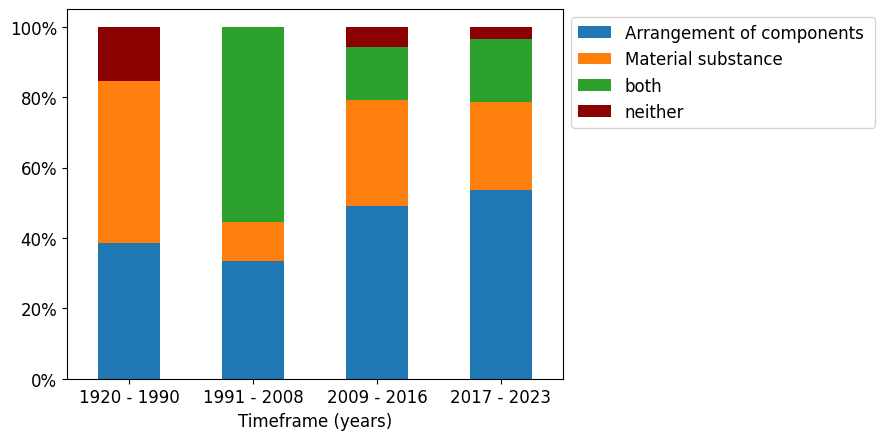

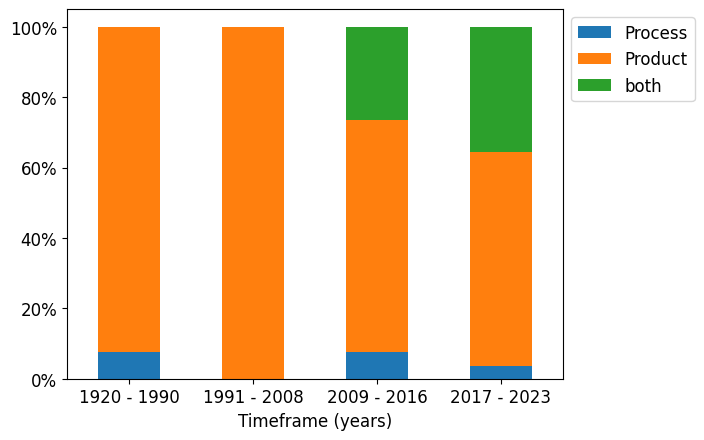

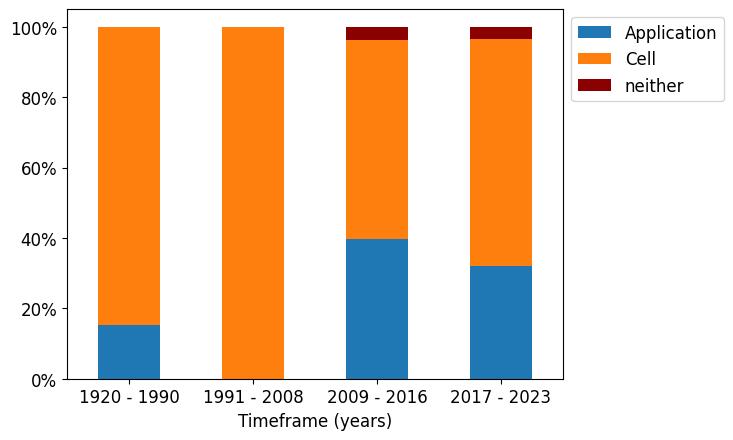

In [58]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Get the default color cycle
default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

for question in questions:
    freq_prop = pd.crosstab(questions_df['Timeframe'], questions_df[question], normalize="index")
    
    # Create a color map with 'neither' as red and all other categories with default colors
    colors = {category: 'darkred' if category == 'neither' else default_colors[i % len(default_colors)] 
              for i, category in enumerate(freq_prop.columns)}
    
    # Pass the color map to the plot function
    ax = freq_prop.plot(kind='bar', stacked=True, color=[colors[val] for val in freq_prop.columns])
    
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
    plt.xticks(rotation=0)
    plt.legend(bbox_to_anchor=(1, 1), loc='upper left', title=None)
    plt.xlabel('Timeframe (years)')
    plt.savefig(f'plot_{question}.png', bbox_inches='tight')
    plt.show()


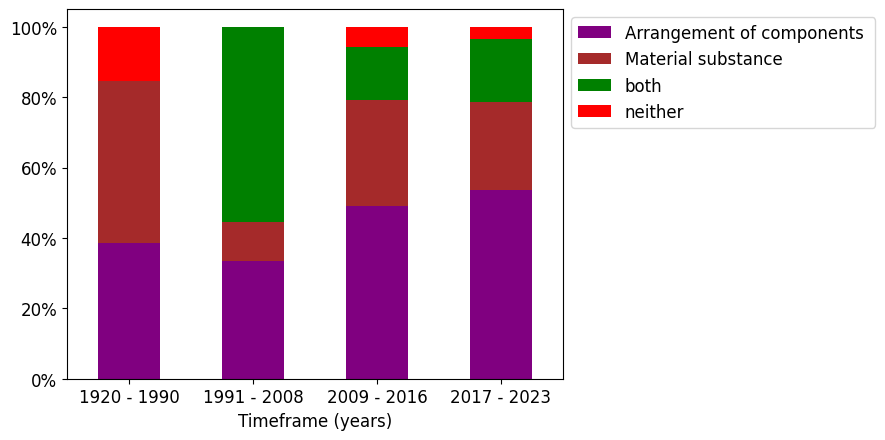

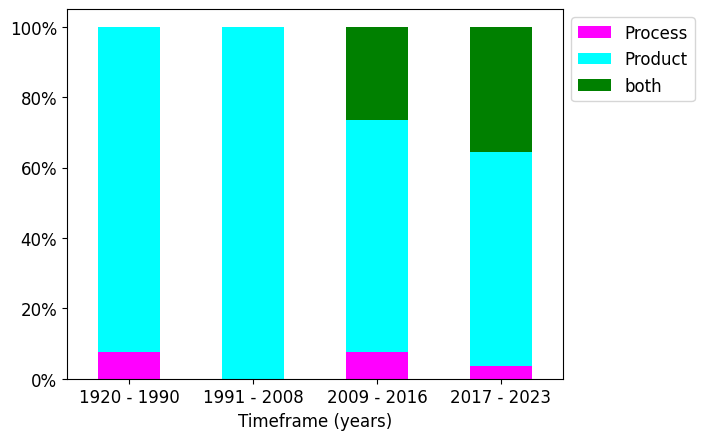

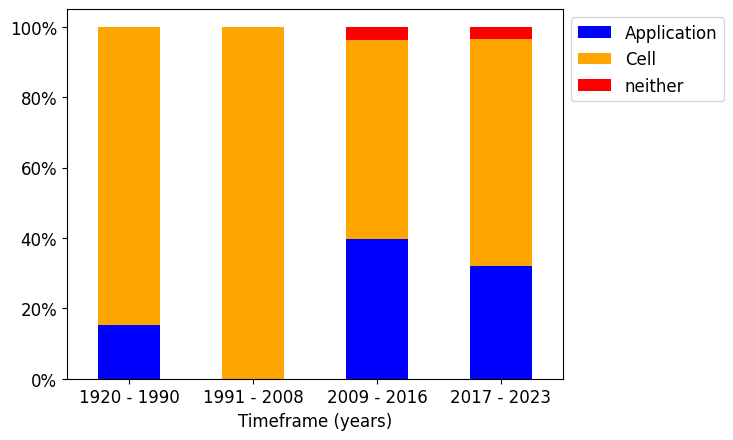

In [59]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Define a color dictionary
# colors = {'neither': 'red', 'both': 'green', 'Application': 'blue', 'Cell': 'orange',
#          'Arrangement of components':, 'Material substance':,}  # Add all your values here
colors = {
    'neither': 'red', 
    'both': 'green', 
    'Application': 'blue', 
    'Cell': 'orange',
    'Arrangement of components ': 'purple', 
    'Material substance': 'brown',
    'Product': 'cyan',
    'Process': 'magenta'
}

for question in questions:
    freq_prop = pd.crosstab(questions_df['Timeframe'], questions_df[question], normalize="index")
    # Pass the color dictionary to the plot function
    ax = freq_prop.plot(kind='bar', stacked=True, color=[colors[val] for val in freq_prop.columns])
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
    plt.xticks(rotation=0)
    plt.legend(bbox_to_anchor=(1, 1), loc='upper left', title=None)
    plt.xlabel('Timeframe (years)')
    plt.savefig(f'plot_{question}.png', bbox_inches='tight')
    plt.show()


Timeframe
1920 - 1990    11
1991 - 2008     6
2009 - 2016     4
2017 - 2023     4
Name: count, dtype: int64


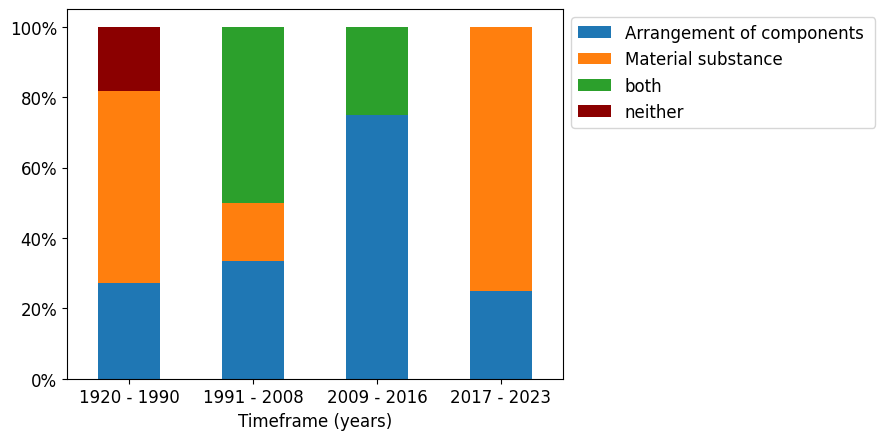

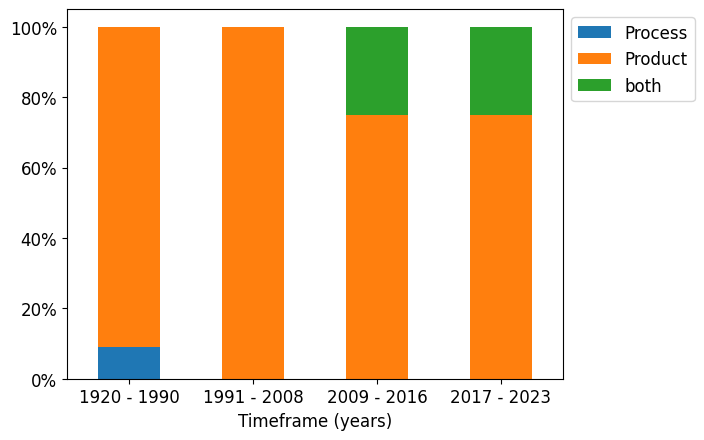

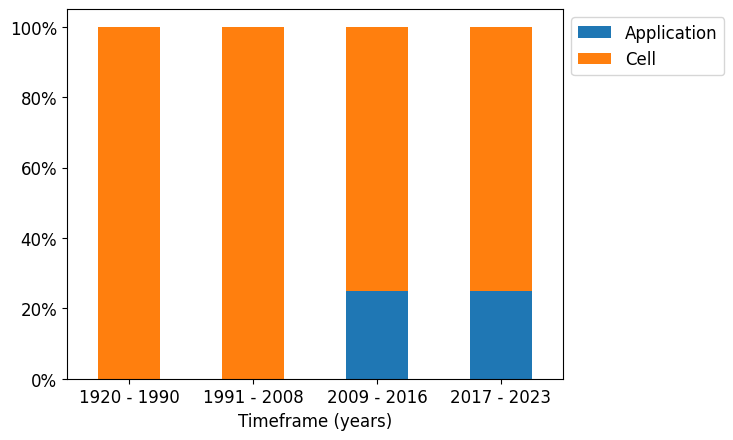

In [60]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

#negative importances
questions_df = pd.DataFrame()

for sheet in sheet_names:
    sheet_Kai = pd.read_excel(filepath_Kai, sheet_name=sheet)
    sheet_Kai = sheet_Kai[(sheet_Kai['cluster'].isin([25, 221, 320, 1475])) | 
                          (sheet_Kai['Unnamed: 0'].isin(['particle+separator', 'antenna+instrument']))]
    sheet_Kai = deduplicate(sheet_Kai)
    questions_Kai = sheet_Kai.iloc[:,6:9]
    
    questions_Kai['Timeframe'] = sheet
    
    questions_df = pd.concat([questions_df,questions_Kai], axis=0)

questions_df.reset_index(drop=True, inplace=True)

print(questions_df['Timeframe'].value_counts())

default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

for question in questions:
    freq_prop = pd.crosstab(questions_df['Timeframe'], questions_df[question], normalize="index")
    
    # Create a color map with 'neither' as red and all other categories with default colors
    colors = {category: 'darkred' if category == 'neither' else default_colors[i % len(default_colors)] 
              for i, category in enumerate(freq_prop.columns)}
    
    # Pass the color map to the plot function
    ax = freq_prop.plot(kind='bar', stacked=True, color=[colors[val] for val in freq_prop.columns])
    
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
    plt.xticks(rotation=0)
    plt.legend(bbox_to_anchor=(1, 1), loc='upper left', title=None)
    plt.xlabel('Timeframe (years)')
    plt.savefig(f'plot_{question}.png', bbox_inches='tight')
    plt.show()


Timeframe
2009 - 2016    53
2017 - 2023    28
1920 - 1990    13
1991 - 2008     9
Name: count, dtype: int64


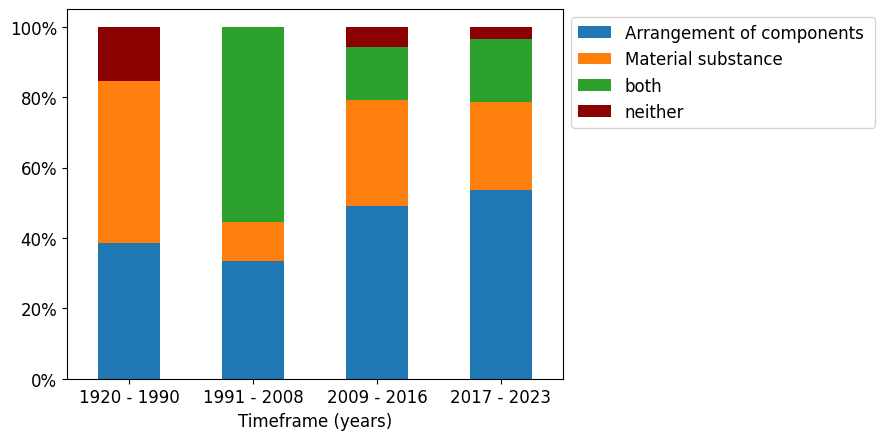

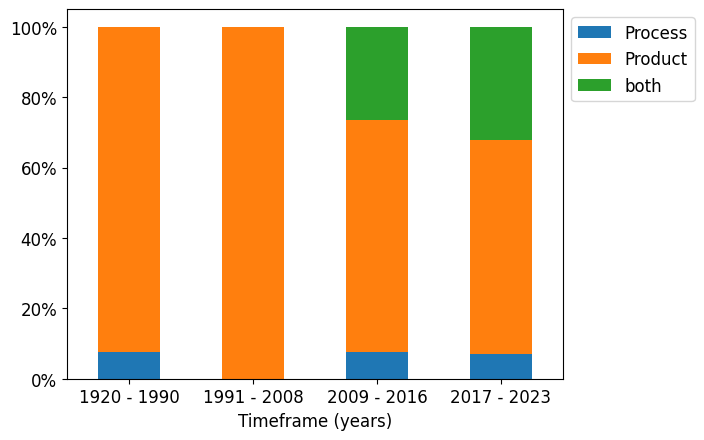

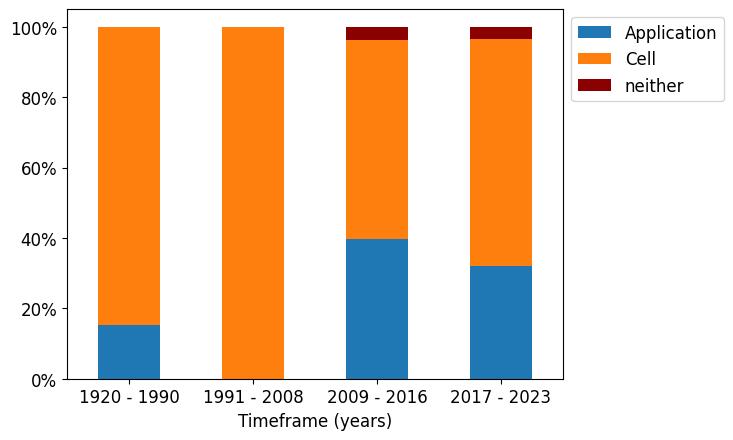

In [61]:
#positive importances
questions_df = pd.DataFrame()

for sheet in sheet_names:
    sheet_Kai = pd.read_excel(filepath_Kai, sheet_name=sheet)
    sheet_Kai = sheet_Kai[~(sheet_Kai['cluster'].isin([25, 221, 320, 1475])) | 
                          ~(sheet_Kai['Unnamed: 0'].isin(['particle+separator', 'antenna+instrument']))]
    sheet_Kai = deduplicate(sheet_Kai)
    questions_Kai = sheet_Kai.iloc[:,6:9]
    
    questions_Kai['Timeframe'] = sheet
    
    questions_df = pd.concat([questions_df,questions_Kai], axis=0)

questions_df.reset_index(drop=True, inplace=True)

print(questions_df['Timeframe'].value_counts())

default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

for question in questions:
    freq_prop = pd.crosstab(questions_df['Timeframe'], questions_df[question], normalize="index")
    
    # Create a color map with 'neither' as red and all other categories with default colors
    colors = {category: 'darkred' if category == 'neither' else default_colors[i % len(default_colors)] 
              for i, category in enumerate(freq_prop.columns)}
    
    # Pass the color map to the plot function
    ax = freq_prop.plot(kind='bar', stacked=True, color=[colors[val] for val in freq_prop.columns])
    
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
    plt.xticks(rotation=0)
    plt.legend(bbox_to_anchor=(1, 1), loc='upper left', title=None)
    plt.xlabel('Timeframe (years)')
    plt.savefig(f'plot_{question}.png', bbox_inches='tight')
    plt.show()


In [62]:
questions_df

,Question 2,Question 3,Question 4,Timeframe
0,Arrangement of components,Product,Application,1920 - 1990
1,Arrangement of components,Product,Application,1920 - 1990
2,Material substance,Product,Cell,1920 - 1990
3,Arrangement of components,Product,Cell,1920 - 1990
4,Arrangement of components,Process,Cell,1920 - 1990
...,...,...,...,...
98,Material substance,Product,Cell,2017 - 2023
99,Material substance,Product,Cell,2017 - 2023
100,Material substance,Product,Cell,2017 - 2023
101,Arrangement of components,Product,Application,2017 - 2023


Timeframe
2009-2016    133
2017-2023     66
1991-2008     24
1920-1990     21
Name: count, dtype: int64


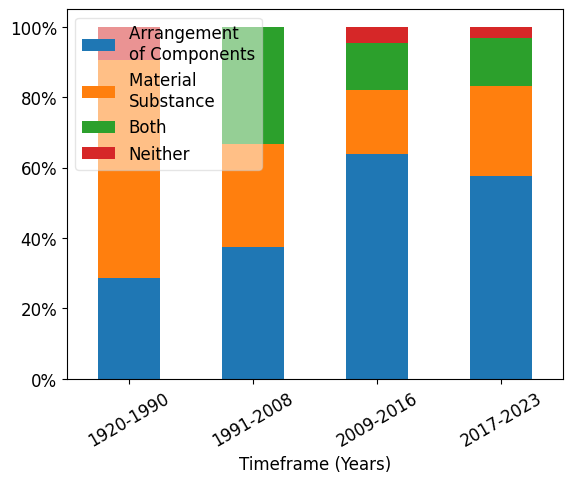

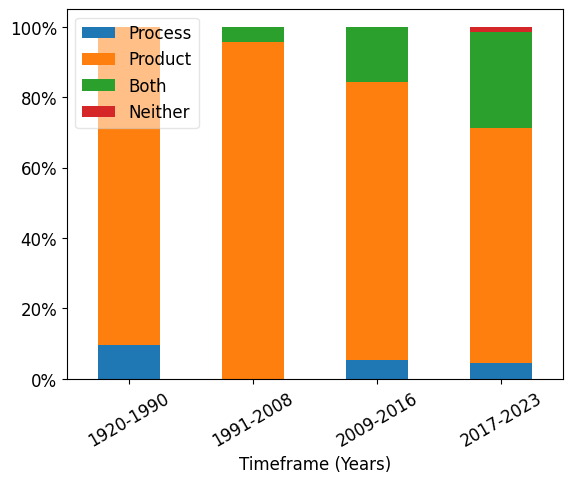

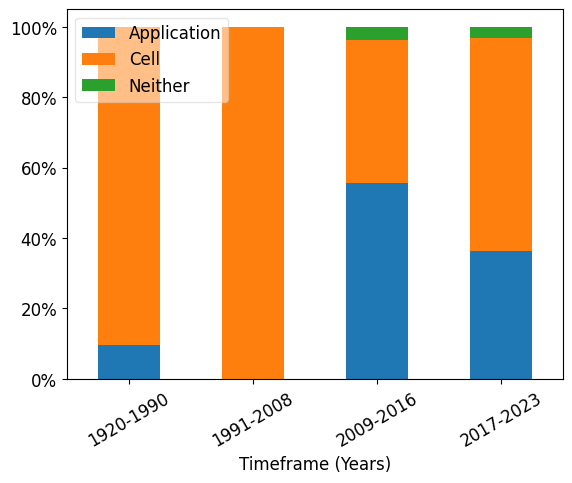

In [66]:
#not removing duplicates:
plt.rcParams['font.size'] = 12
legend_labels_list = [['Arrangement \nof Components', 'Material \nSubstance', 'Both', 'Neither'],
                     ['Process', 'Product', 'Both', 'Neither'], ['Application', 'Cell', 'Neither']]

questions_df = pd.DataFrame()

for sheet in sheet_names:
    sheet_Kai = pd.read_excel(filepath_Kai, sheet_name=sheet)
    #sheet_Kai = deduplicate(sheet_Kai)
    questions_Kai = sheet_Kai.iloc[:,7:10]
    questions_Kai.columns = questions
    questions_Kai['Timeframe'] = sheet
    
    questions_df = pd.concat([questions_df,questions_Kai], axis=0)

questions_df.reset_index(drop=True, inplace=True)
questions_df['Timeframe'] = questions_df['Timeframe'].str.replace(' ', '')
# Replace 'both' with 'Both' and 'neither' with 'Neither'
#questions_df = questions_df.replace({'Arrangement of components': 'Arrangement \n of Components', 'Material substance': 'Material Substance', 'both': 'Both', 'neither': 'Neither'})

print(questions_df['Timeframe'].value_counts())
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
#plt.figure(figsize=(6, 4))

for i, question in enumerate(questions):
    freq_prop = pd.crosstab(questions_df['Timeframe'], questions_df[question], normalize="index")
    
    # Create a color map with 'neither' as red and all other categories with default colors
    colors = {category: 'darkred' if category == 'Neither' else default_colors[i % len(default_colors)] 
              for i, category in enumerate(freq_prop.columns)}
    
    # Pass the color map to the plot function
    ax = freq_prop.plot(kind='bar', stacked=True, color=[colors[val] for val in freq_prop.columns])
    
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
    plt.xticks(rotation=30)
    plt.xlabel('Timeframe (Years)')
    plt.legend(legend_labels_list[i], framealpha=0.5, title=None, loc='upper left') #bbox_to_anchor=(1, 1), loc='upper left',
    plt.savefig(f'plot_{question}.png', bbox_inches='tight')
    plt.show()


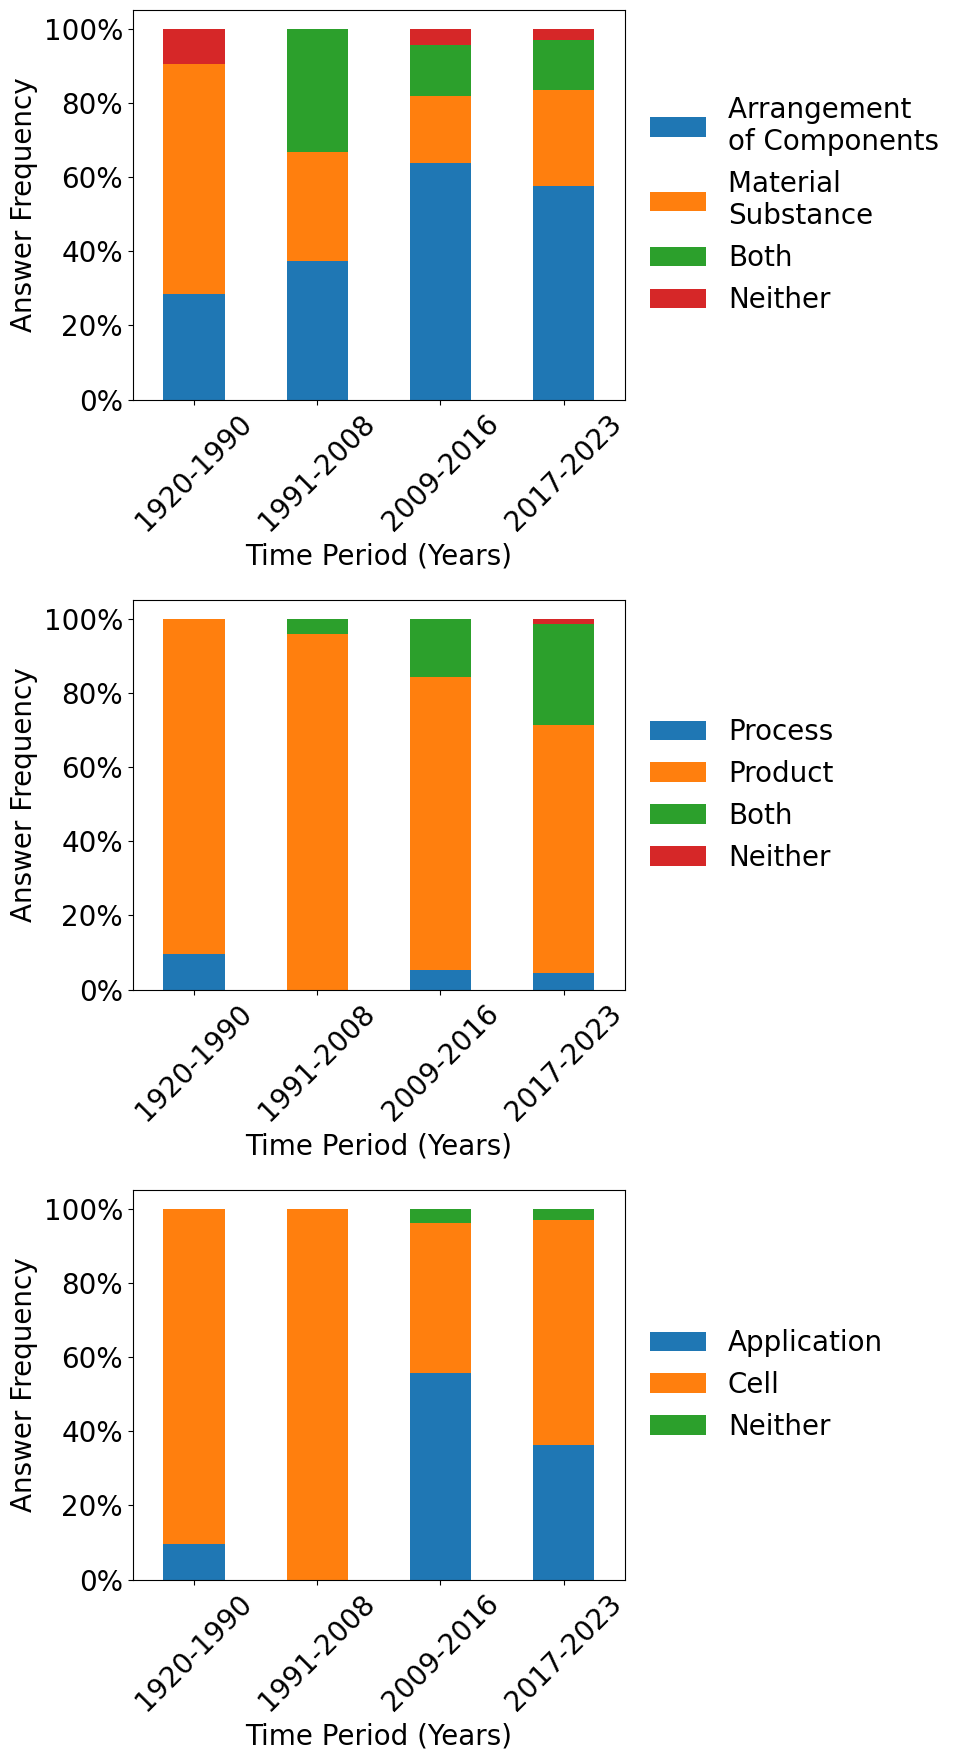

In [109]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

plt.rcParams['font.size'] = 20
default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Create a figure and a set of subplots
fig, axs = plt.subplots(len(questions), 1, figsize=(10, 6*len(questions)))

for i, question in enumerate(questions):
    freq_prop = pd.crosstab(questions_df['Timeframe'], questions_df[question], normalize="index")
    
    # Create a color map with 'neither' as red and all other categories with default colors
    colors = {category: 'darkred' if category == 'Neither' else default_colors[i % len(default_colors)] 
              for i, category in enumerate(freq_prop.columns)}
    
    # Pass the color map to the plot function
    ax = freq_prop.plot(kind='bar', stacked=True, color=[colors[val] for val in freq_prop.columns], ax=axs[i])
    
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
    plt.xticks(rotation=30)
    ax.set_xlabel('Time Period (Years)')
    ax.set_ylabel('Answer Frequency')
    ax.legend(legend_labels_list[i], framealpha=0, title=None, bbox_to_anchor=(1, 0.5), loc='center left') 
    ax.tick_params('x', labelrotation=45)

plt.tight_layout()
plt.savefig('plots.png', bbox_inches='tight')
plt.show()


In [110]:
from PIL import Image

# Open the image file
img = Image.open('plots.png')
width, height = img.size

# Define the start and end points for each split
start = 0
end = height // 3  # We divide by 3 because you want to split the image into 3 parts

# Loop through the image and save each part
for i in range(3):
    # Define the bounding box for each split
    bbox = (0, start, width, end)
    
    # Crop the image using the bounding box
    part = img.crop(bbox)
    
    # Save the cropped image
    part.save(f'part_{i}.png')
    
    # Update the start and end points for the next split
    start = end
    end += height // 3


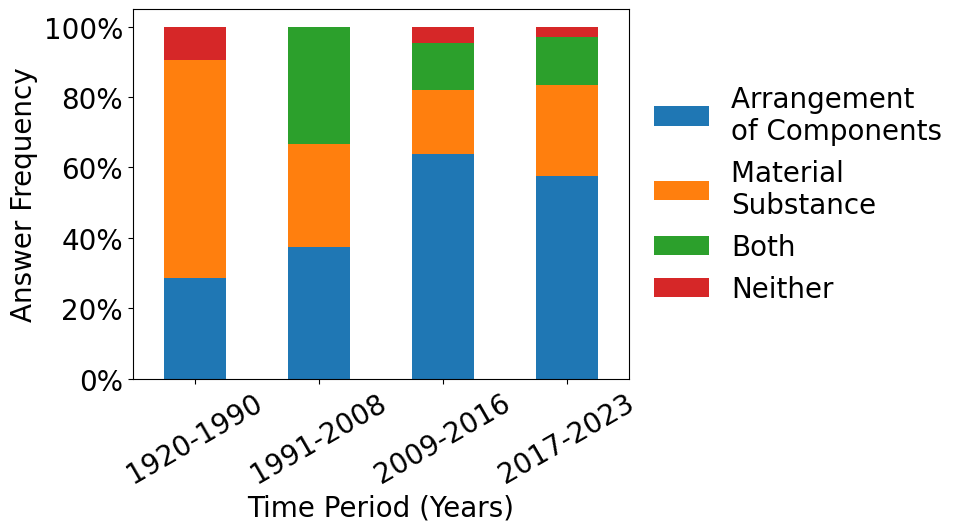

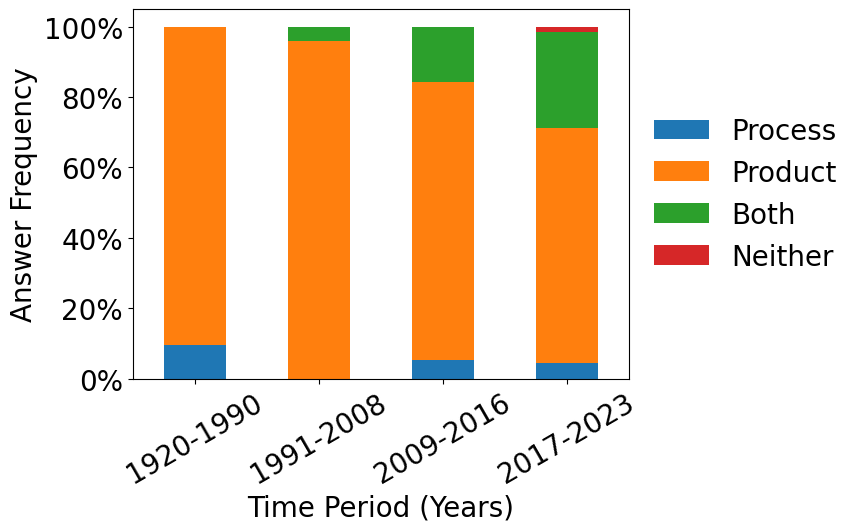

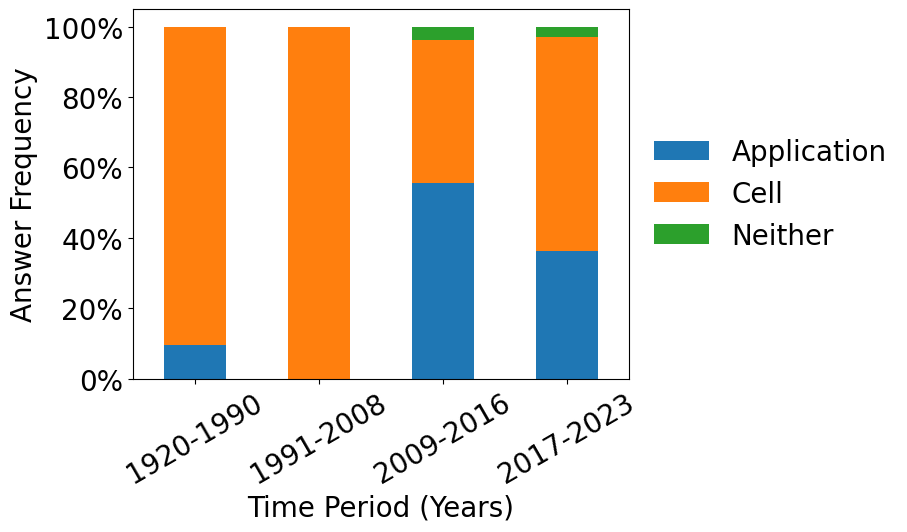

In [98]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
plt.rcParams['font.size'] = 20

default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

for i, question in enumerate(questions):
    freq_prop = pd.crosstab(questions_df['Timeframe'], questions_df[question], normalize="index")
    
    # Create a color map with 'neither' as red and all other categories with default colors
    colors = {category: 'darkred' if category == 'Neither' else default_colors[i % len(default_colors)] 
              for i, category in enumerate(freq_prop.columns)}
    
    # Pass the color map to the plot function
    ax = freq_prop.plot(kind='bar', stacked=True, color=[colors[val] for val in freq_prop.columns])
    
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
    plt.xticks(rotation=30)
    plt.xlabel('Time Period (Years)')
    plt.ylabel('Answer Frequency')
    plt.legend(legend_labels_list[i], framealpha=0, title=None, bbox_to_anchor=(1, 0.5), loc='center left') 
    plt.savefig(f'plot_{question}.png', bbox_inches='tight')
    plt.show()


<Figure size 1000x600 with 0 Axes>

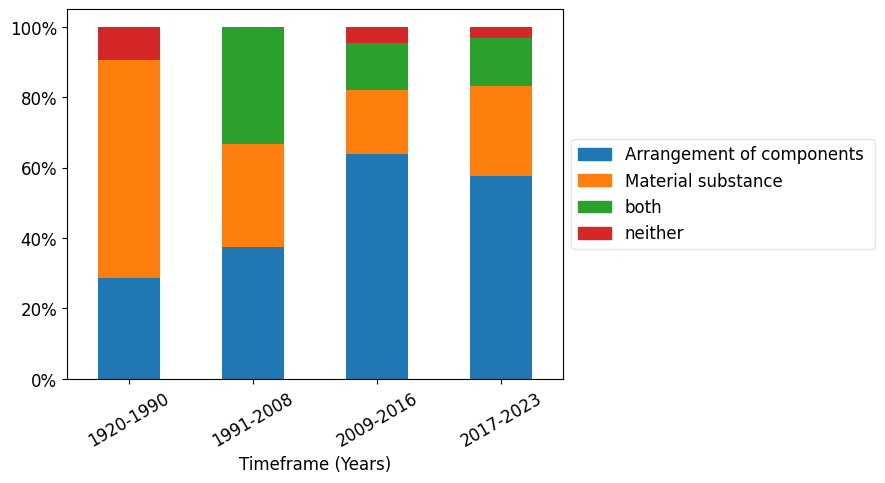

<Figure size 1000x600 with 0 Axes>

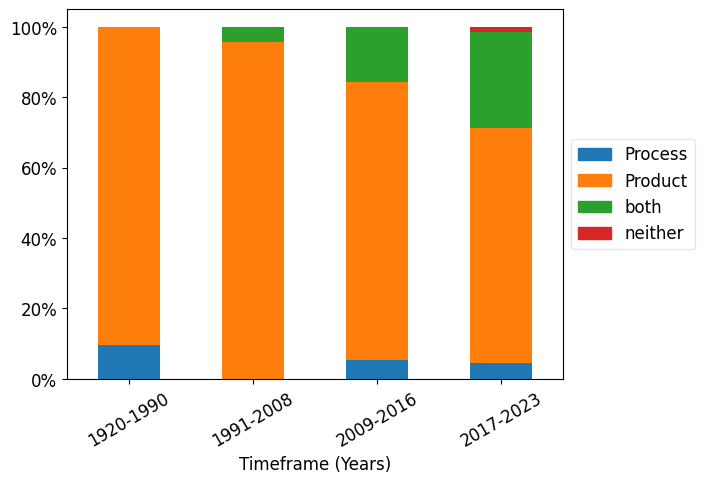

<Figure size 1000x600 with 0 Axes>

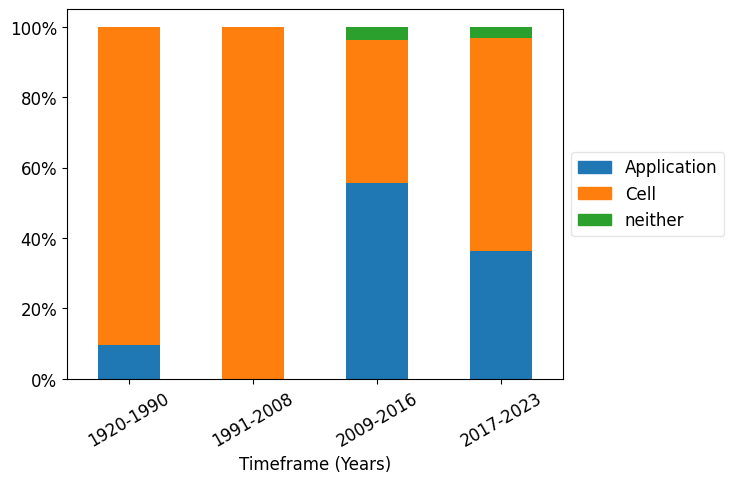

In [84]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.patches as mpatches

default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

for i, question in enumerate(questions):
    plt.figure(figsize=(10, 6))  # Adjust the width and height as needed
    freq_prop = pd.crosstab(questions_df['Timeframe'], questions_df[question], normalize="index")
    
    # Create a color map with 'neither' as red and all other categories with default colors
    colors = {category: 'darkred' if category == 'Neither' else default_colors[i % len(default_colors)] 
              for i, category in enumerate(freq_prop.columns)}
    
    # Pass the color map to the plot function
    ax = freq_prop.plot(kind='bar', stacked=True, color=[colors[val] for val in freq_prop.columns])
    
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
    plt.xticks(rotation=30)
    plt.xlabel('Timeframe (Years)')
    
    # Create a custom legend
    patches = [mpatches.Patch(color=colors[val], label=val) for val in freq_prop.columns]
    plt.legend(handles=patches, framealpha=0.5, title=None, bbox_to_anchor=(1, 0.5), loc='center left')
    
    plt.savefig(f'plot_{question}.png', bbox_inches='tight')
    plt.show()


In [85]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.patches as mpatches

default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Calculate the width needed for each plot
widths = []
for i, question in enumerate(questions):
    plt.figure(figsize=(10, 6))  # Adjust the width and height as needed
    freq_prop = pd.crosstab(questions_df['Timeframe'], questions_df[question], normalize="index")
    
    # Create a color map with 'neither' as red and all other categories with default colors
    colors = {category: 'darkred' if category == 'Neither' else default_colors[i % len(default_colors)] 
              for i, category in enumerate(freq_prop.columns)}
    
    # Pass the color map to the plot function
    ax = freq_prop.plot(kind='bar', stacked=True, color=[colors[val] for val in freq_prop.columns])
    
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
    plt.xticks(rotation=30)
    plt.xlabel('Timeframe (Years)')
    
    # Create a custom legend
    patches = [mpatches.Patch(color=colors[val], label=val) for val in freq_prop.columns]
    legend = plt.legend(handles=patches, framealpha=0.5, title=None, bbox_to_anchor=(1, 0.5), loc='center left')
    
    # Render the figure to calculate its size
    plt.draw()
    
    # Get the width of the figure and the legend
    fig_width = plt.gcf().get_size_inches()[0]
    legend_width = legend.get_window_extent().transformed(plt.gcf().dpi_scale_trans.inverted()).width
    
    # Calculate the total width needed for the plot and its legend
    total_width = fig_width + legend_width
    
    # Add some extra space for the plots with short legend names
    total_width += 1  # Adjust this value as needed
    
    # Add the total width to the list of widths
    widths.append(total_width)
    
    plt.close()

# Use the maximum width for all plots
max_width = max(widths)

for i, question in enumerate(questions):
    plt.figure(figsize=(max_width, 6))  # Use the maximum width for all plots
    ...


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1044.12x600 with 0 Axes>

<Figure size 1044.12x600 with 0 Axes>

<Figure size 1044.12x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1044.12x600 with 0 Axes>

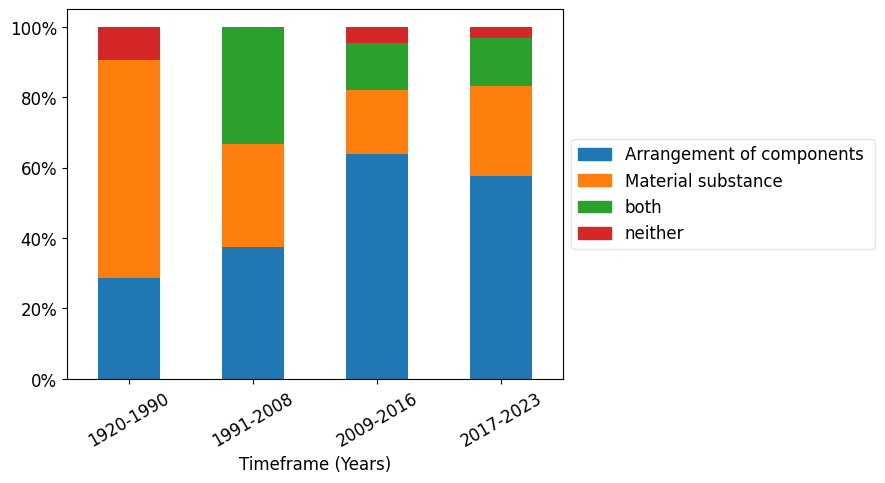

<Figure size 1044.12x600 with 0 Axes>

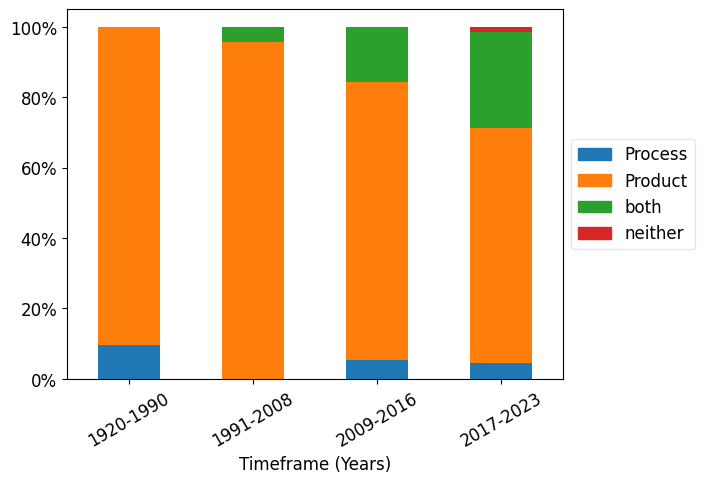

<Figure size 1044.12x600 with 0 Axes>

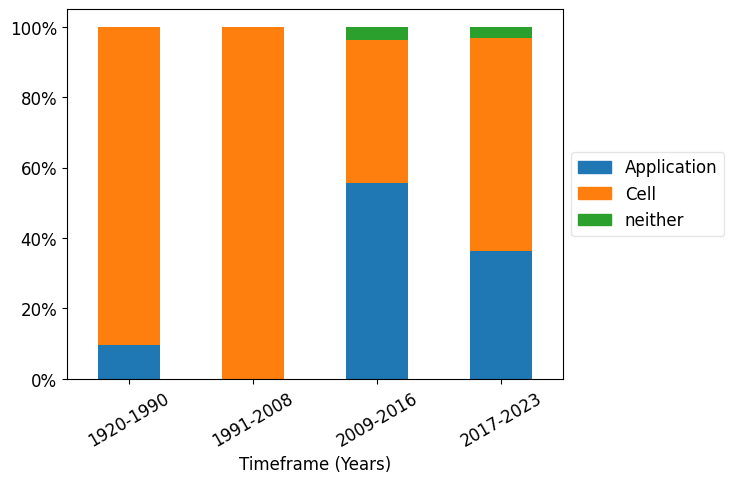

In [86]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.patches as mpatches

default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Calculate the width needed for each plot
widths = []
for i, question in enumerate(questions):
    plt.figure(figsize=(10, 6))  # Adjust the width and height as needed
    freq_prop = pd.crosstab(questions_df['Timeframe'], questions_df[question], normalize="index")
    
    # Create a color map with 'neither' as red and all other categories with default colors
    colors = {category: 'darkred' if category == 'Neither' else default_colors[i % len(default_colors)] 
              for i, category in enumerate(freq_prop.columns)}
    
    # Pass the color map to the plot function
    ax = freq_prop.plot(kind='bar', stacked=True, color=[colors[val] for val in freq_prop.columns])
    
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
    plt.xticks(rotation=30)
    plt.xlabel('Timeframe (Years)')
    
    # Create a custom legend
    patches = [mpatches.Patch(color=colors[val], label=val) for val in freq_prop.columns]
    legend = plt.legend(handles=patches, framealpha=0.5, title=None, bbox_to_anchor=(1, 0.5), loc='center left')
    
    # Render the figure to calculate its size
    plt.draw()
    
    # Get the width of the figure and the legend
    fig_width = plt.gcf().get_size_inches()[0]
    legend_width = legend.get_window_extent().transformed(plt.gcf().dpi_scale_trans.inverted()).width
    
    # Calculate the total width needed for the plot and its legend
    total_width = fig_width + legend_width
    
    # Add some extra space for the plots with short legend names
    total_width += 1  # Adjust this value as needed
    
    # Add the total width to the list of widths
    widths.append(total_width)
    
    plt.close()

# Use the maximum width for all plots
max_width = max(widths)

for i, question in enumerate(questions):
    plt.figure(figsize=(max_width, 6))  # Use the maximum width for all plots
    freq_prop = pd.crosstab(questions_df['Timeframe'], questions_df[question], normalize="index")
    
    # Create a color map with 'neither' as red and all other categories with default colors
    colors = {category: 'darkred' if category == 'Neither' else default_colors[i % len(default_colors)] 
              for i, category in enumerate(freq_prop.columns)}
    
    # Pass the color map to the plot function
    ax = freq_prop.plot(kind='bar', stacked=True, color=[colors[val] for val in freq_prop.columns])
    
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
    plt.xticks(rotation=30)
    plt.xlabel('Timeframe (Years)')
    
    # Create a custom legend
    patches = [mpatches.Patch(color=colors[val], label=val) for val in freq_prop.columns]
    plt.legend(handles=patches, framealpha=0.5, title=None, bbox_to_anchor=(1, 0.5), loc='center left')
    
    plt.savefig(f'plot_{question}.png', bbox_inches='tight')
    plt.show()


<Figure size 1000x600 with 0 Axes>

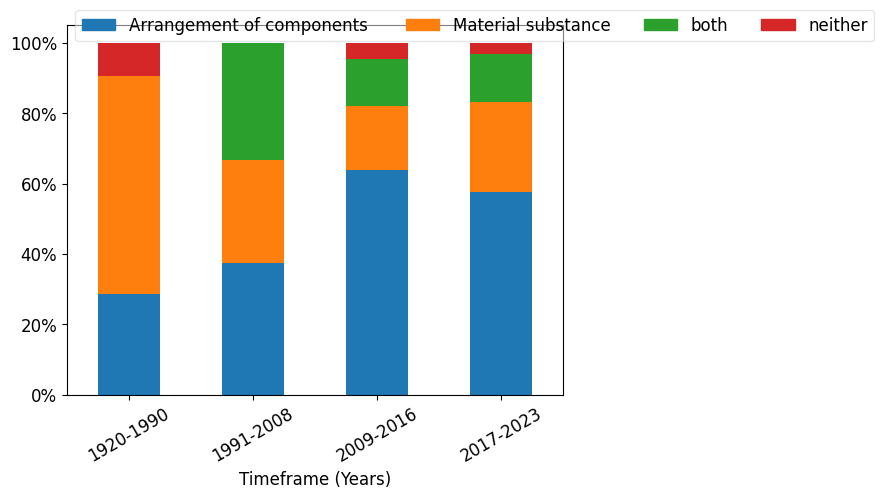

<Figure size 1000x600 with 0 Axes>

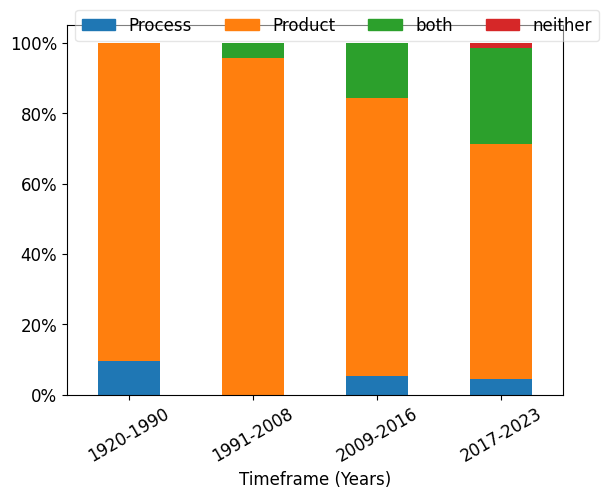

<Figure size 1000x600 with 0 Axes>

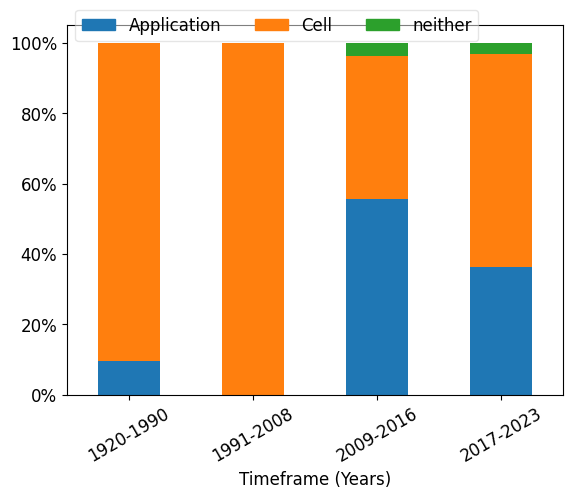

In [91]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.patches as mpatches

default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

max_cols = max(len(labels) for labels in legend_labels_list)  # Get the maximum number of legend labels

for i, question in enumerate(questions):
    plt.figure(figsize=(10, 6))  # Adjust the width and height as needed
    freq_prop = pd.crosstab(questions_df['Timeframe'], questions_df[question], normalize="index")
    
    # Create a color map with 'neither' as red and all other categories with default colors
    colors = {category: 'darkred' if category == 'Neither' else default_colors[i % len(default_colors)] 
              for i, category in enumerate(freq_prop.columns)}
    
    # Pass the color map to the plot function
    ax = freq_prop.plot(kind='bar', stacked=True, color=[colors[val] for val in freq_prop.columns])
    
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
    plt.xticks(rotation=30)
    plt.xlabel('Timeframe (Years)')
    
    # Create a custom legend with a fixed number of columns
    patches = [mpatches.Patch(color=colors[val], label=val) for val in freq_prop.columns]
    plt.legend(handles=patches, framealpha=0.5, title=None, bbox_to_anchor=(0, 1), loc='center left', ncol=max_cols)
    
    plt.savefig(f'plot_{question}.png', bbox_inches='tight')
    plt.show()


<Figure size 1000x600 with 0 Axes>

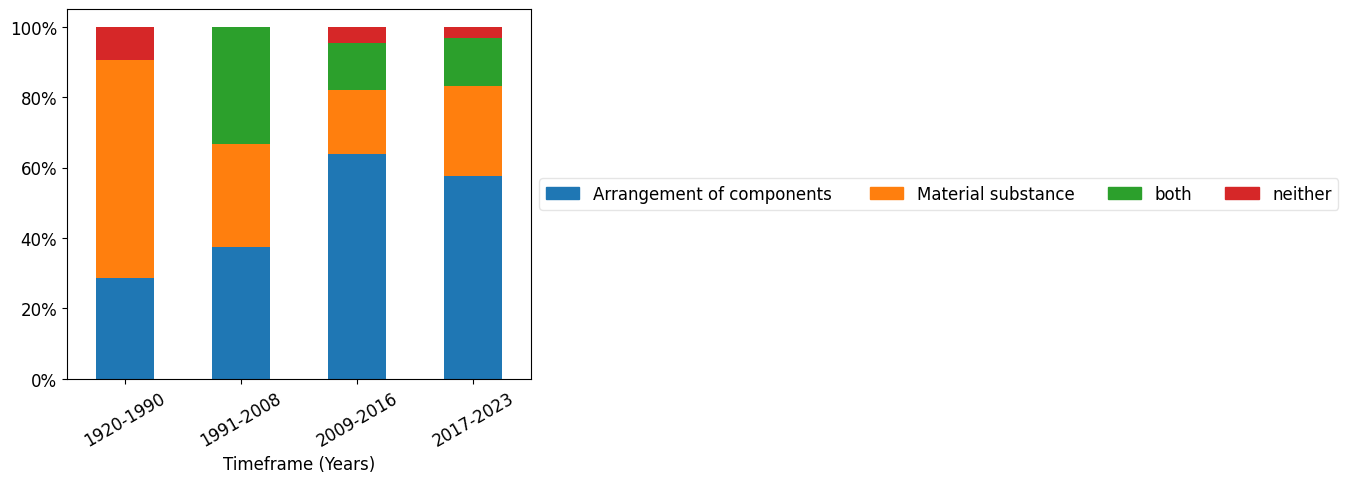

<Figure size 1000x600 with 0 Axes>

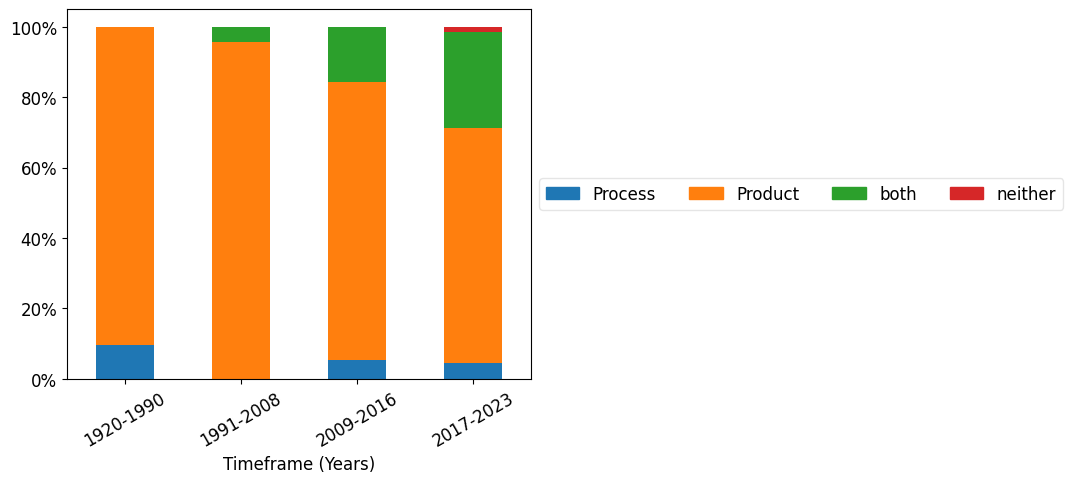

<Figure size 1000x600 with 0 Axes>

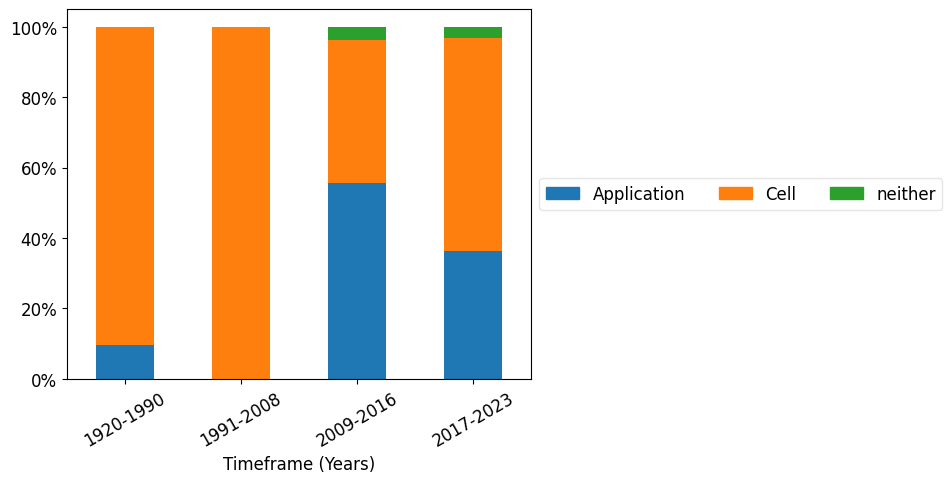

In [92]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.patches as mpatches

default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

max_cols = max(len(labels) for labels in legend_labels_list)  # Get the maximum number of legend labels

for i, question in enumerate(questions):
    plt.figure(figsize=(10, 6))  # Adjust the width and height as needed
    freq_prop = pd.crosstab(questions_df['Timeframe'], questions_df[question], normalize="index")
    
    # Create a color map with 'neither' as red and all other categories with default colors
    colors = {category: 'darkred' if category == 'Neither' else default_colors[i % len(default_colors)] 
              for i, category in enumerate(freq_prop.columns)}
    
    # Pass the color map to the plot function
    ax = freq_prop.plot(kind='bar', stacked=True, color=[colors[val] for val in freq_prop.columns])
    
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
    plt.xticks(rotation=30)
    plt.xlabel('Timeframe (Years)')
    
    # Create a custom legend with a fixed number of columns
    patches = [mpatches.Patch(color=colors[val], label=val) for val in freq_prop.columns]
    plt.legend(handles=patches, framealpha=0.5, title=None, bbox_to_anchor=(1, 0.5), loc='center left', ncol=max_cols)
    
    # Adjust the margins
    plt.subplots_adjust(right=0.85)  # Adjust this value as needed
    
    plt.savefig(f'plot_{question}.png', bbox_inches='tight')
    plt.show()
